In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from scipy.stats import norm 
from sklearn.preprocessing import StandardScaler 
from scipy import stats 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc


In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [4]:
missing_data = df.isnull().sum()

In [5]:
missing_data

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
missing_data = (df.isnull().sum() / len(df)) * 100
missing_data

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [8]:
missing_data = missing_data[missing_data > 0].sort_values(ascending=True)

In [9]:
missing_data

Electrical       0.068493
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageYrBlt      5.547945
GarageType       5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
MasVnrType      59.726027
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

In [10]:
garage_null_filtered = df[(df['GarageCars'].notnull()) & (df['GarageFinish'].isnull())]

garage_area_description = garage_null_filtered[['GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt', 'GarageType', 'GarageCars', 'GarageArea']]['GarageArea'].describe()

garage_area_description

count    81.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: GarageArea, dtype: float64

In [12]:
missing_count = df.isnull().sum()
missing_percentage = (missing_count / len(df)) * 100

agg = pd.DataFrame({
    'column': df.columns,
    'count': missing_count,
    'percent': missing_percentage
})

In [13]:
garage_agg = agg[agg['column'].isin(['GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt', 'GarageType'])]

garage_agg

,column,count,percent
GarageType,GarageType,81,5.547945
GarageYrBlt,GarageYrBlt,81,5.547945
GarageFinish,GarageFinish,81,5.547945
GarageQual,GarageQual,81,5.547945
GarageCond,GarageCond,81,5.547945


In [23]:
filtered_garage_data = df[(df['GarageType'].isnull()) & (df['GarageFinish'].isnull())]

selected_columns = filtered_garage_data[['GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt', 'GarageType', 'GarageCars', 'GarageArea']]


In [24]:
selected_columns

,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN,0,0
1407,NaN,NaN,NaN,NaN,NaN,0,0
1449,NaN,NaN,NaN,NaN,NaN,0,0
1450,NaN,NaN,NaN,NaN,NaN,0,0


In [ ]:
#Garage가 없는 곳의 값은 주차장이 없는 것.

In [25]:
index = df[df['GarageType'].isnull()].index
for col in ['GarageFinish', 'GarageQual', 'GarageType', 'GarageCond', 'GarageYrBlt']:
    if df[col].dtypes == 'O':
        df.loc[index, col] = 'None'
    else:
        df.loc[index, col] = -1

In [27]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [28]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [29]:
df.drop(['Alley'],axis=1,inplace=True)

In [30]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [31]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [33]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [34]:
df.drop(['Id'],axis=1,inplace=True)

In [35]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

In [36]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

In [37]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [38]:
df.dropna(inplace=True)

In [39]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1422 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1422 non-null   int64  
 1   MSZoning       1422 non-null   object 
 2   LotFrontage    1422 non-null   float64
 3   LotArea        1422 non-null   int64  
 4   Street         1422 non-null   object 
 5   LotShape       1422 non-null   object 
 6   LandContour    1422 non-null   object 
 7   Utilities      1422 non-null   object 
 8   LotConfig      1422 non-null   object 
 9   LandSlope      1422 non-null   object 
 10  Neighborhood   1422 non-null   object 
 11  Condition1     1422 non-null   object 
 12  Condition2     1422 non-null   object 
 13  BldgType       1422 non-null   object 
 14  HouseStyle     1422 non-null   object 
 15  OverallQual    1422 non-null   int64  
 16  OverallCond    1422 non-null   int64  
 17  YearBuilt      1422 non-null   int64  
 18  YearRemodAdd 

In [41]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,...,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000
mean,56.775668,70.146723,10549.149789,6.146976,5.590717,1971.625879,1985.306610,104.935302,455.495077,47.793249,...,96.068214,47.520394,22.004923,3.374121,15.463432,2.832630,40.994374,6.327004,2007.809423,182889.092124
std,42.250147,22.260343,10097.991235,1.359483,1.109678,30.379224,20.450801,181.942463,456.272479,163.279940,...,126.144490,66.695549,61.184375,29.329871,56.442878,40.708401,493.124430,2.714278,1.326754,79414.407095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7585.750000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,131625.000000
50%,50.000000,70.049958,9501.500000,6.000000,5.000000,1974.000000,1994.000000,0.000000,400.000000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165000.000000
75%,70.000000,79.000000,11635.500000,7.000000,6.000000,2001.000000,2004.000000,168.000000,727.000000,0.000000,...,168.000000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [42]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

numerical_cols, categorical_cols

(Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
        'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
        'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC', 'C

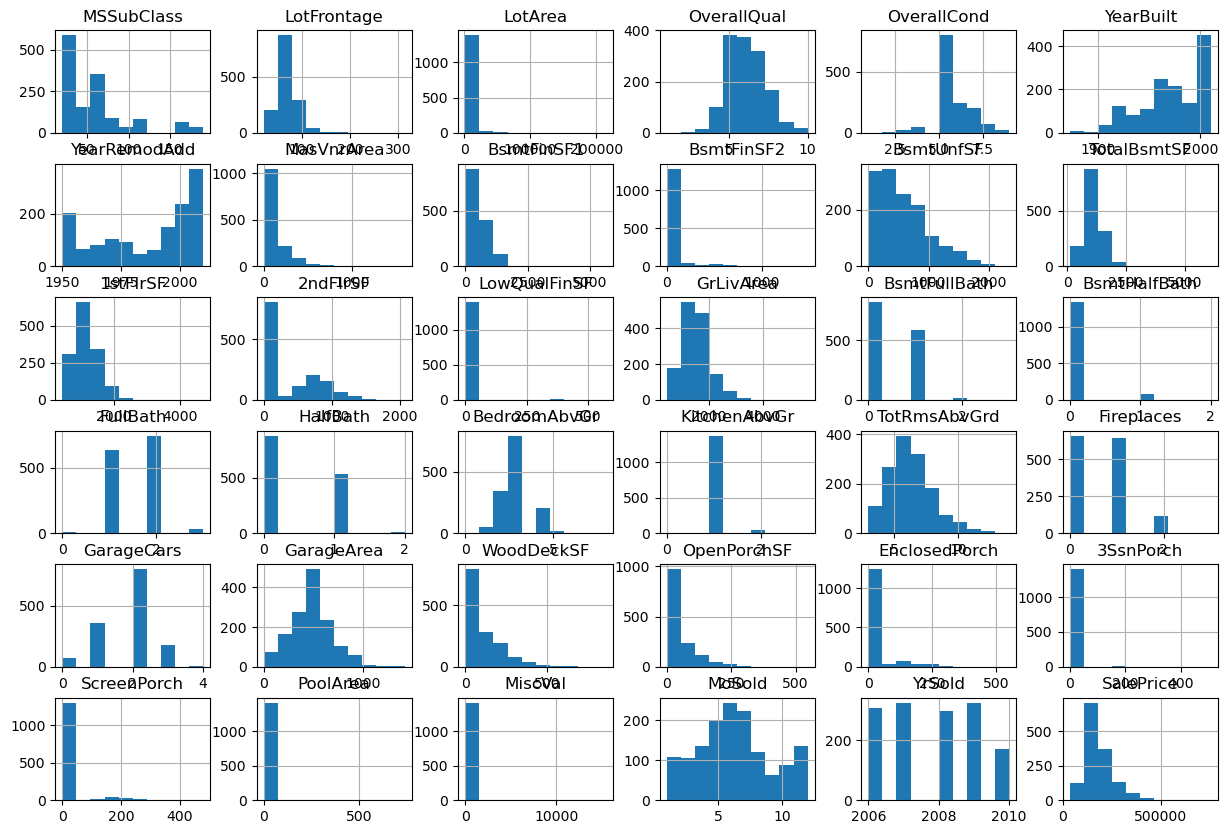

In [43]:
df[numerical_cols].hist(figsize=(15, 10))
plt.show()

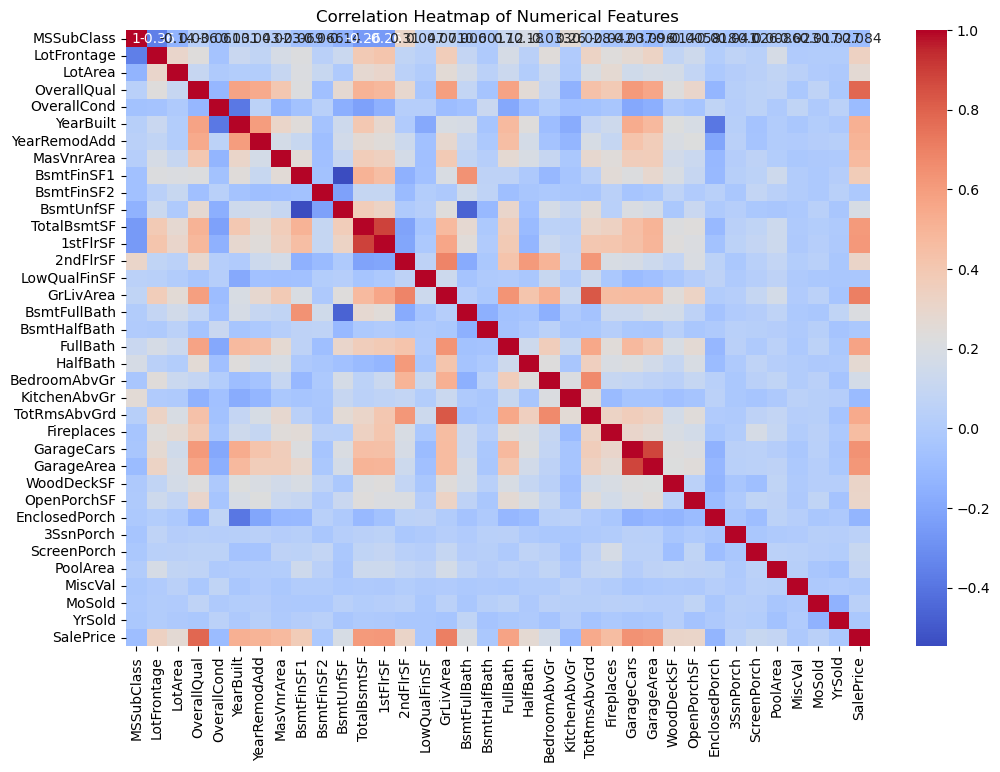

In [48]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

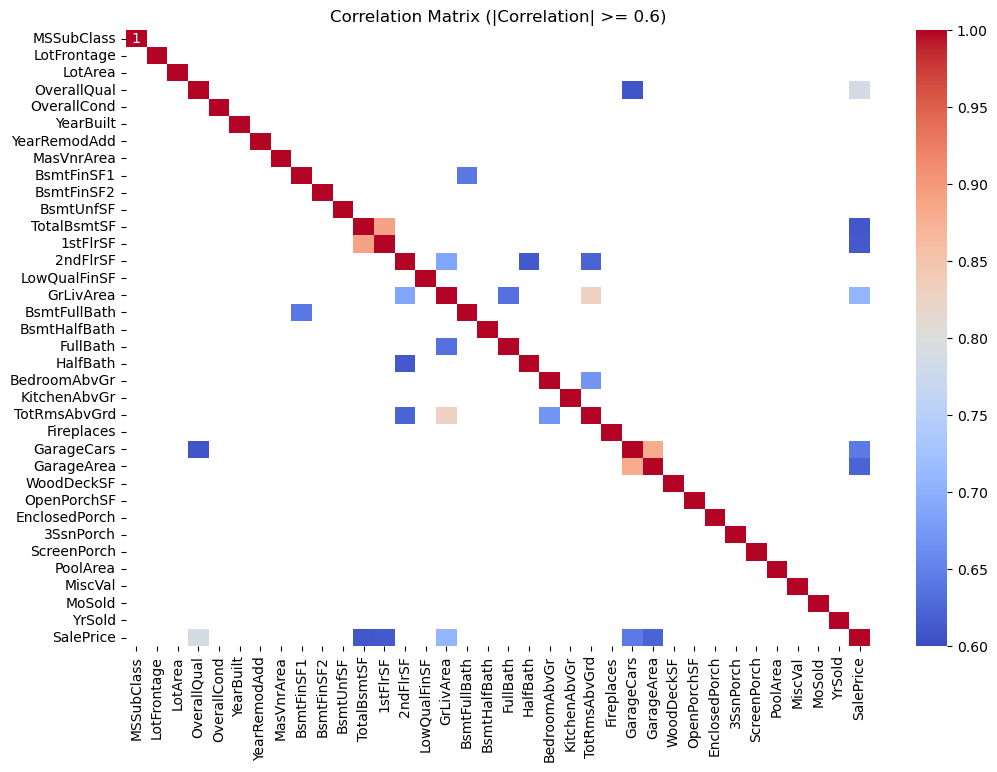

In [50]:
correlation_matrix = numerical_df.corr().abs()
significant_corr = correlation_matrix[correlation_matrix >= 0.6]

significant_corr = significant_corr.dropna(how='all', axis=0).dropna(how='all', axis=1)

plt.figure(figsize=(12, 8))
sns.heatmap(significant_corr, annot=True, cmap='coolwarm', vmin=0.6, vmax=1)
plt.title('Correlation Matrix (|Correlation| >= 0.6)')
plt.show()

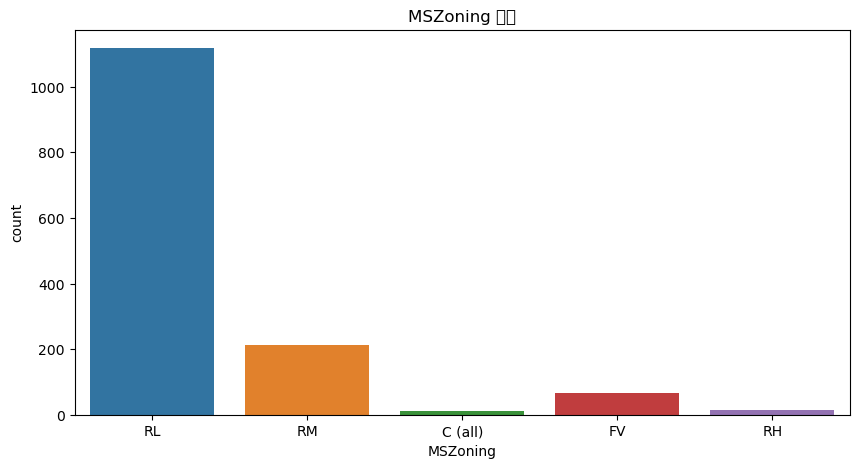

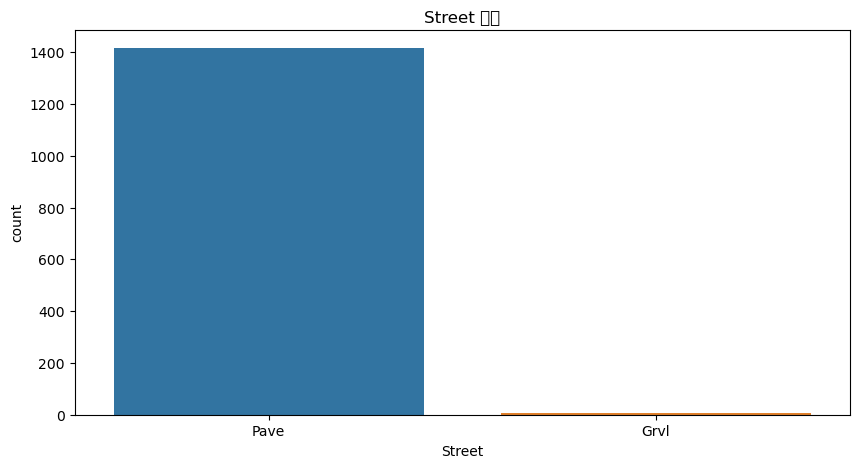

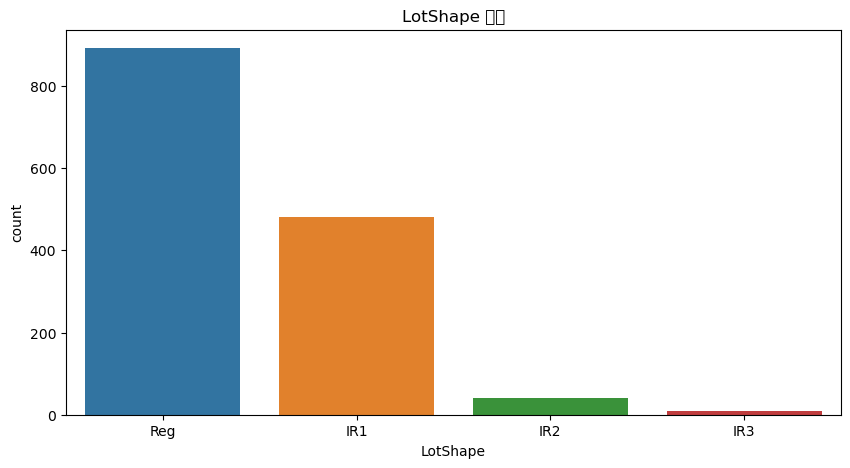

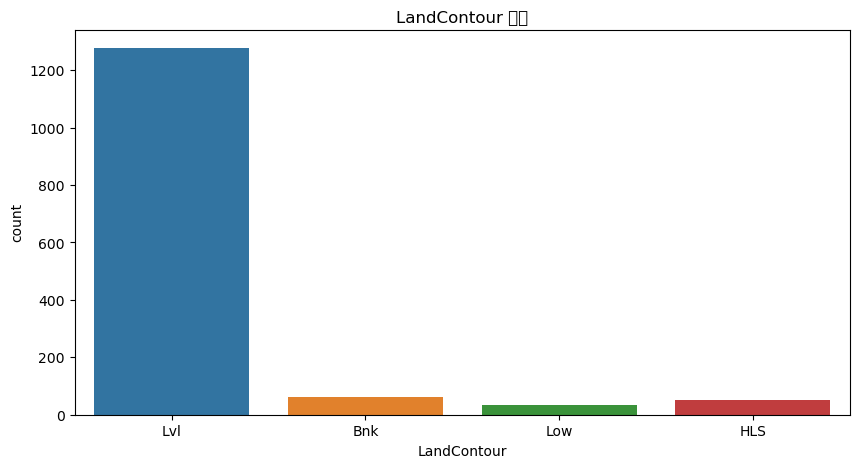

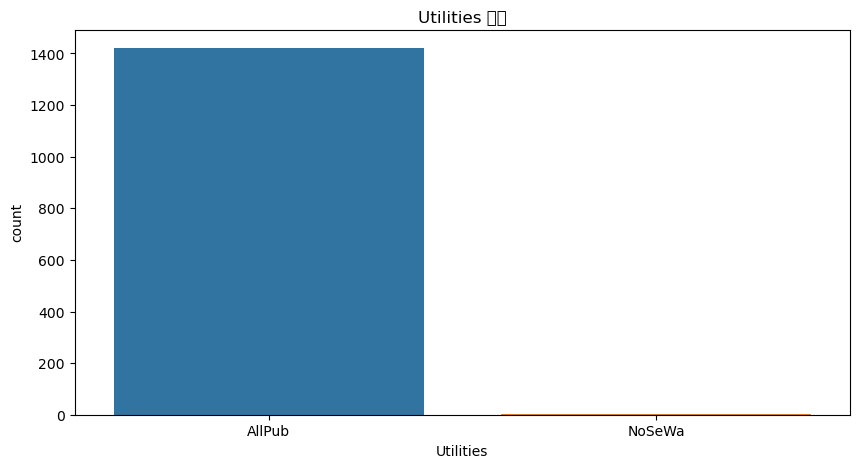

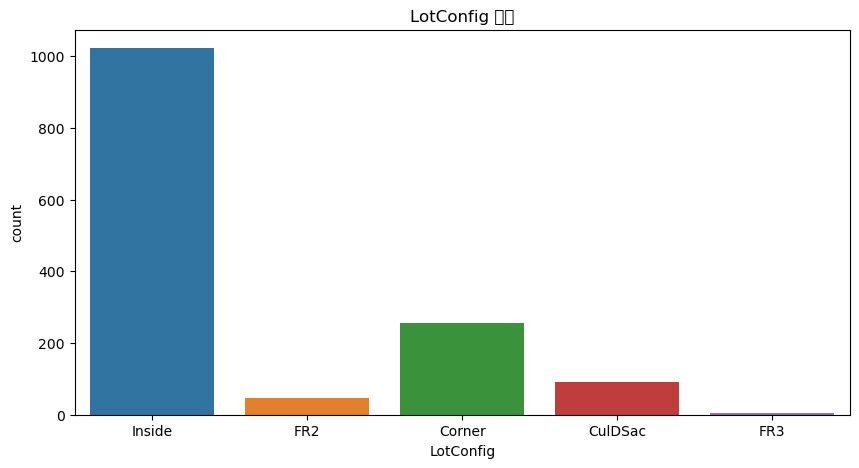

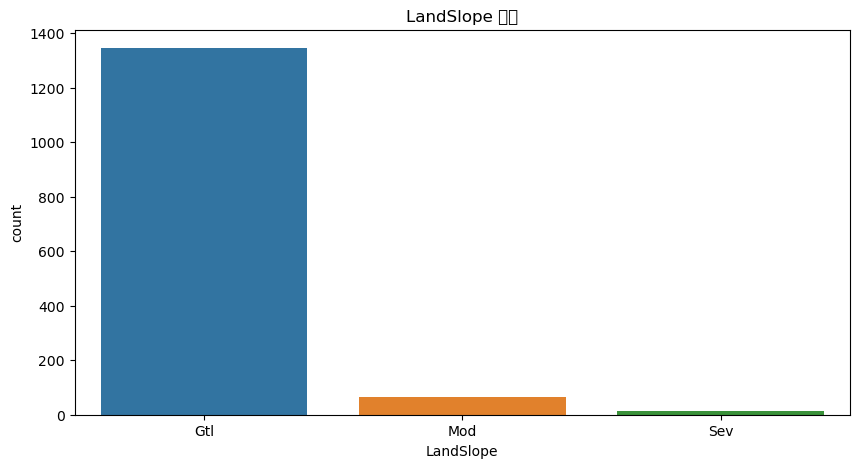

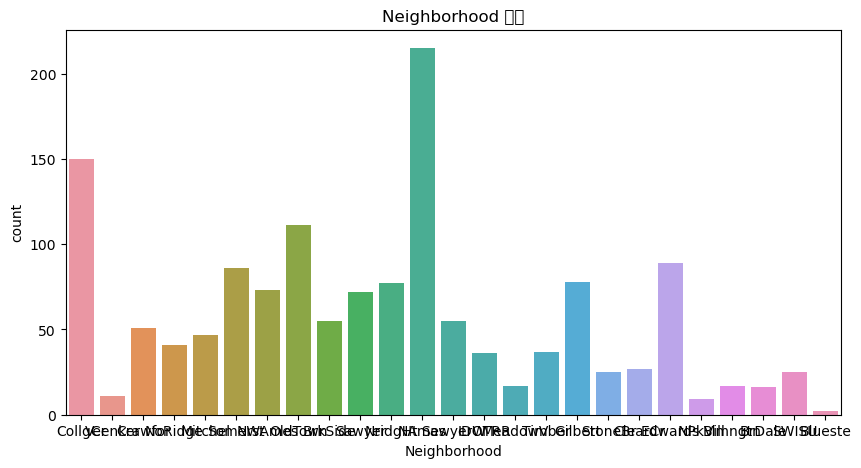

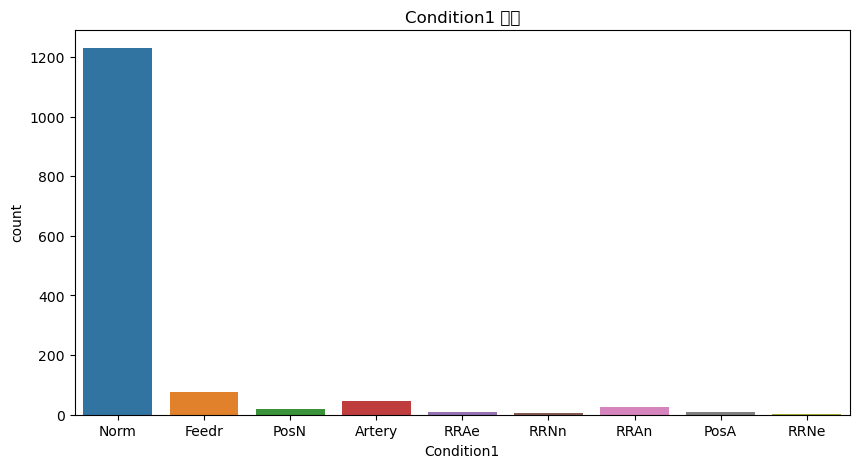

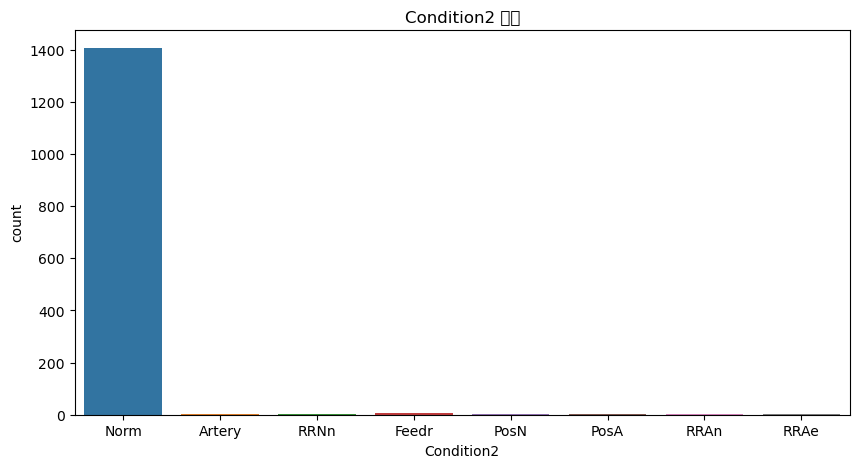

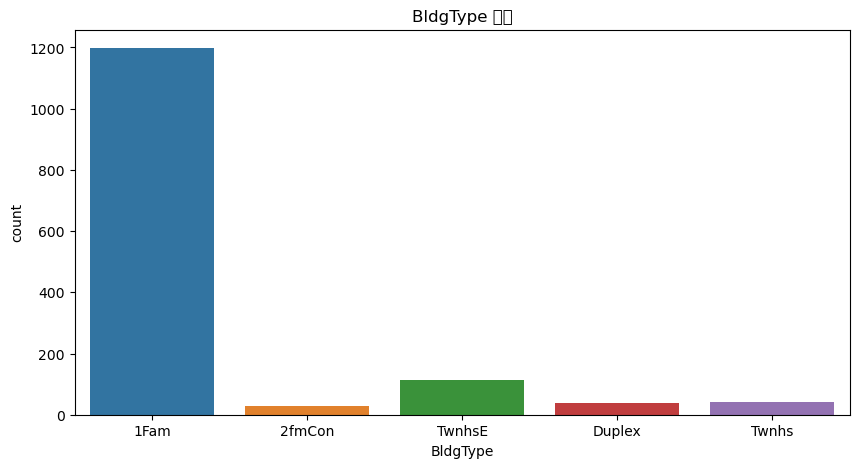

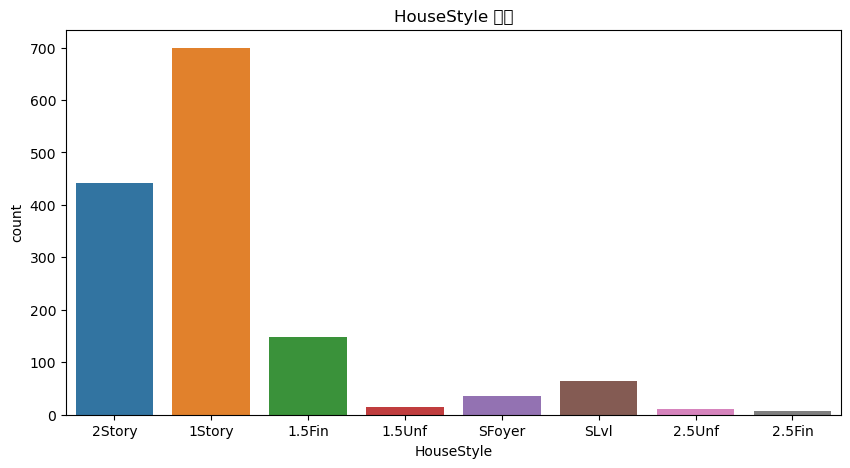

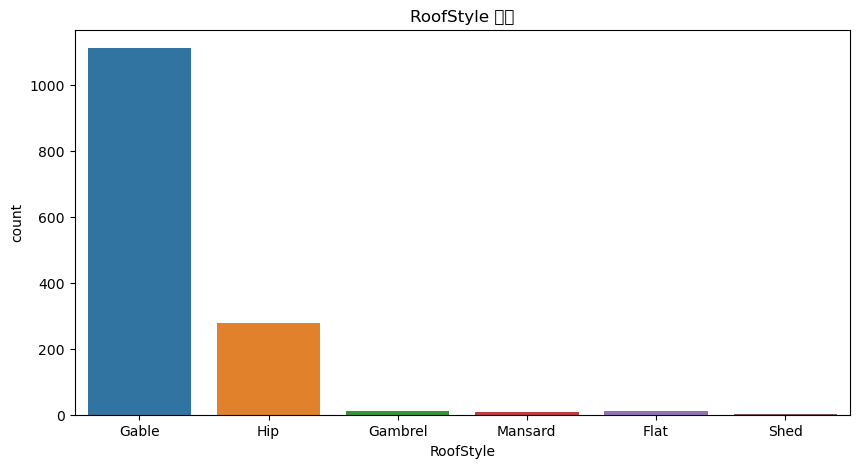

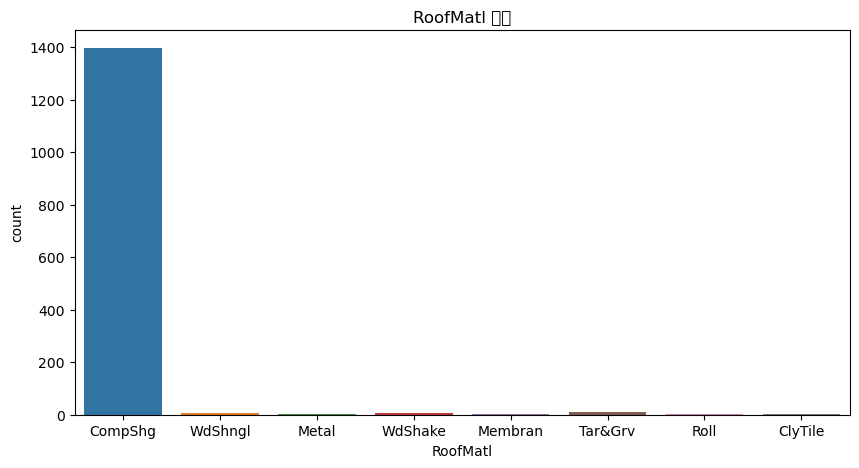

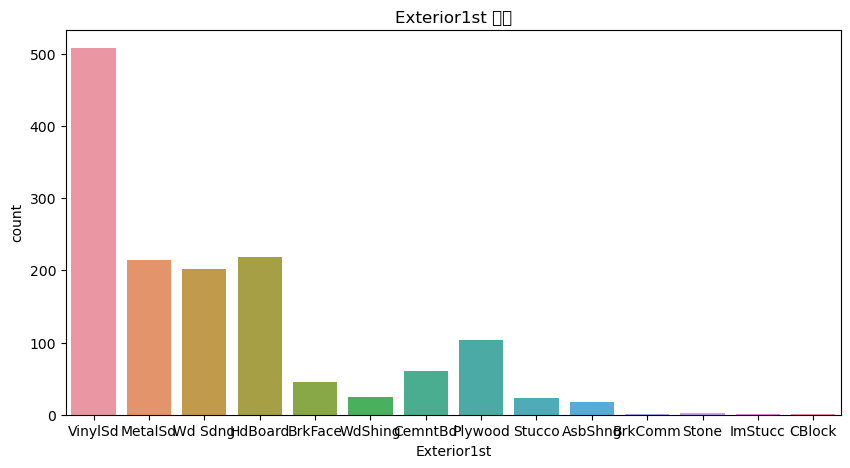

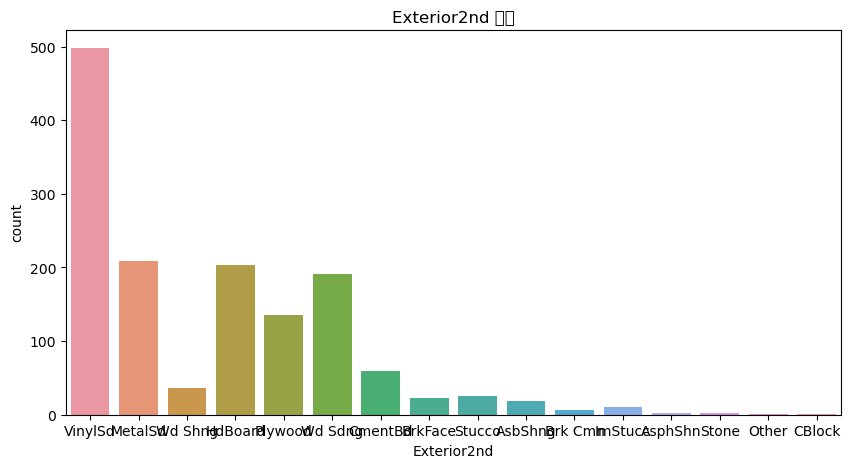

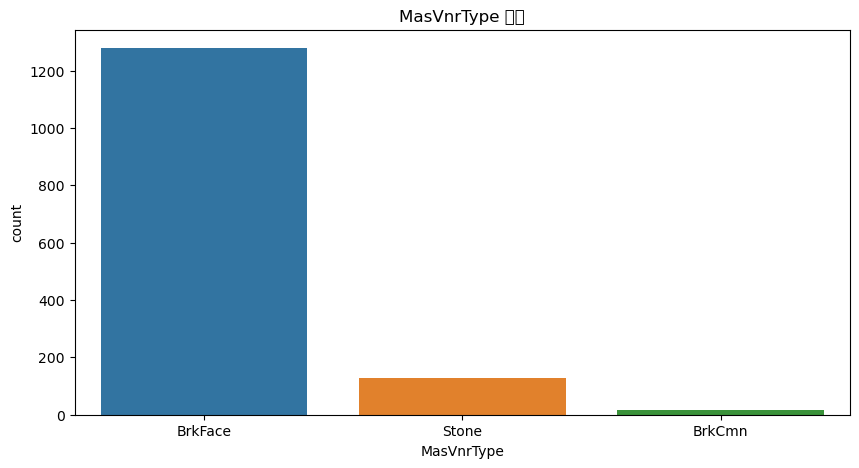

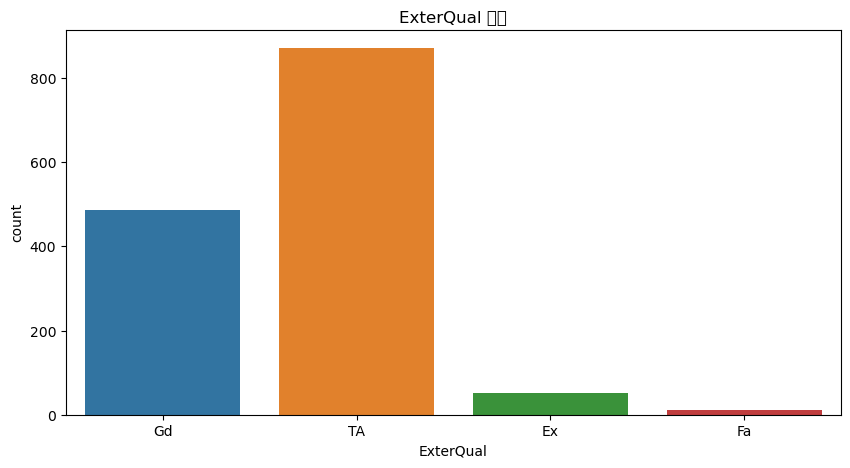

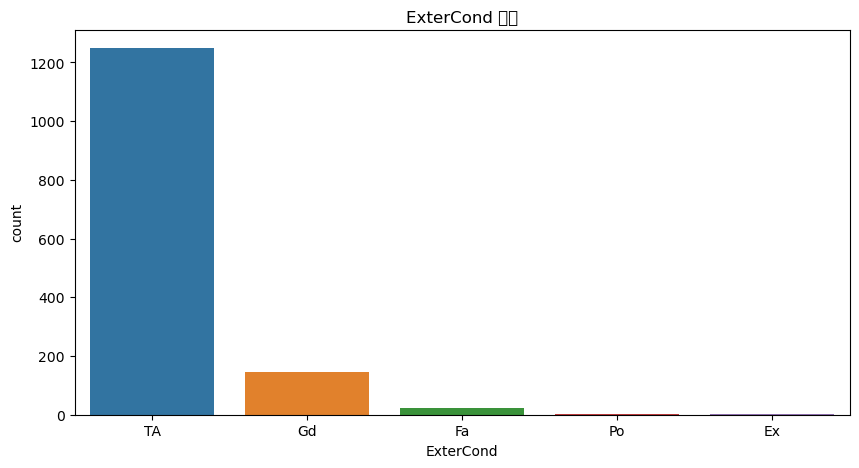

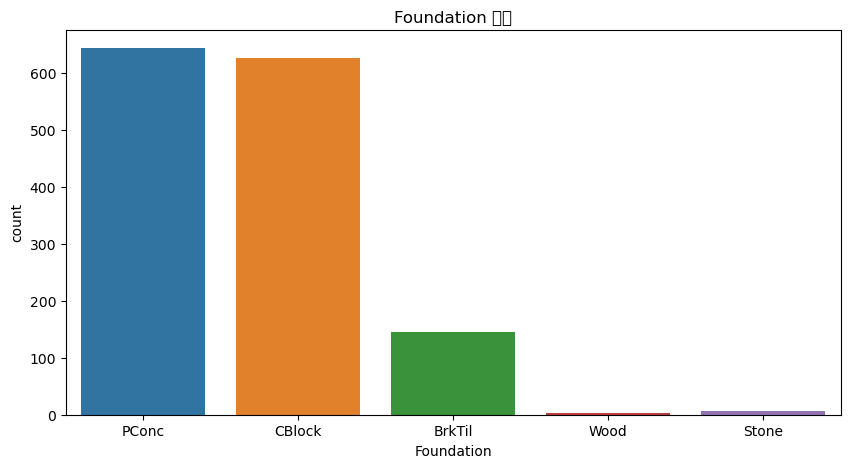

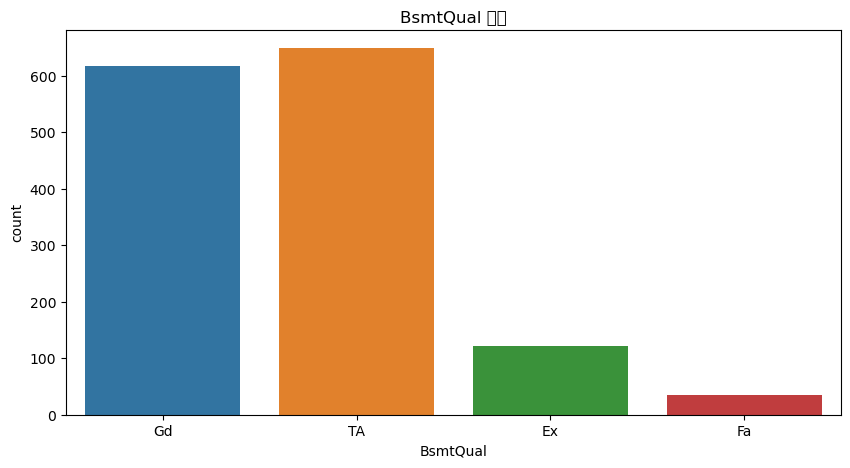

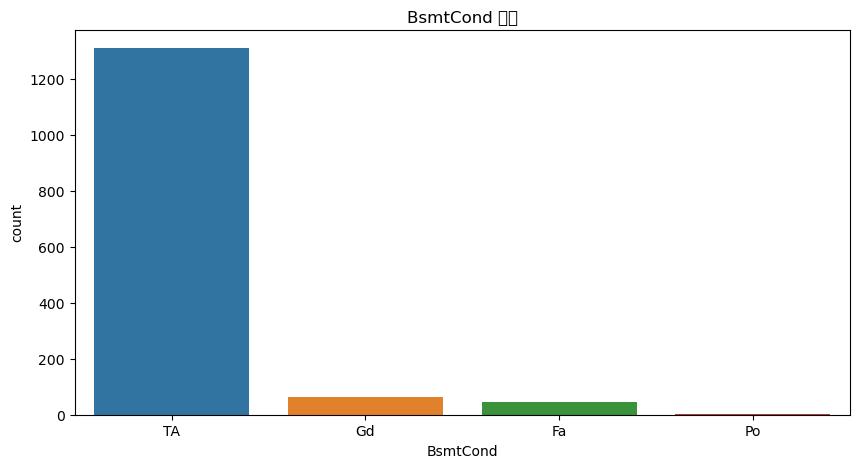

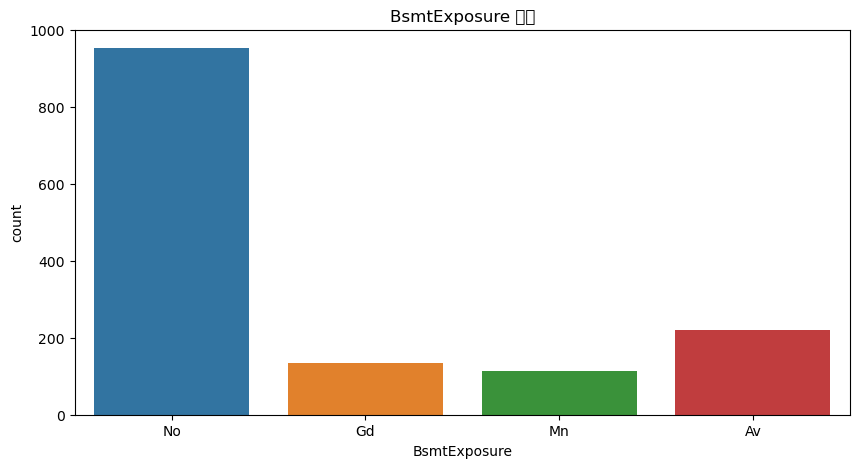

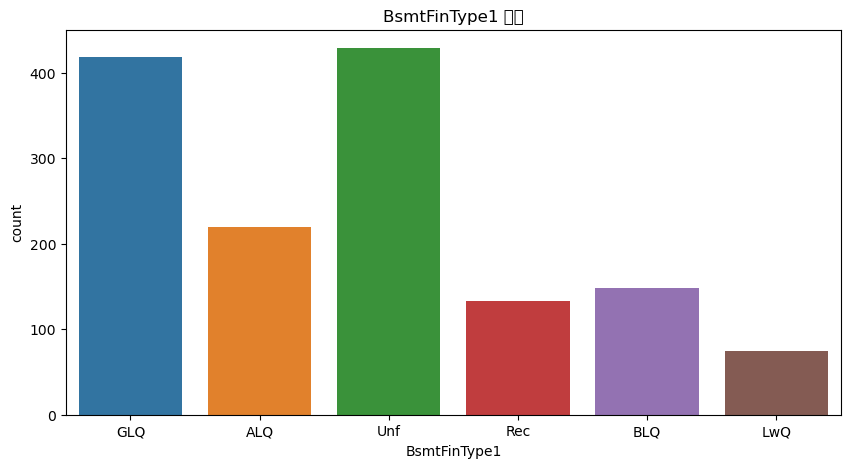

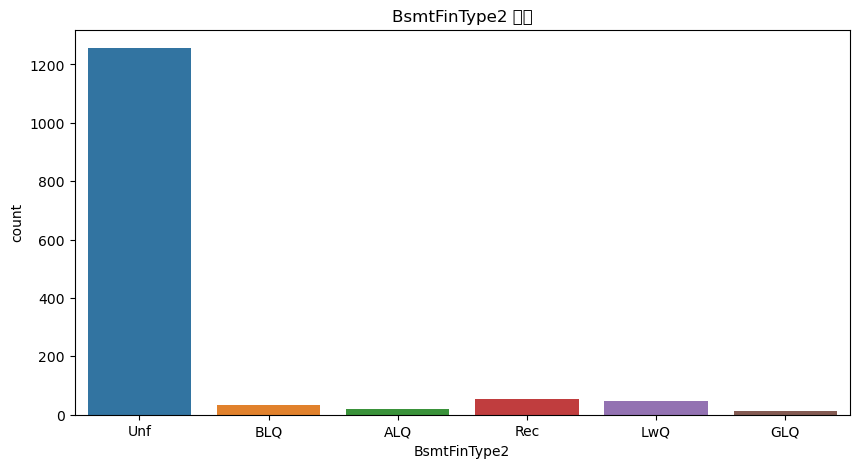

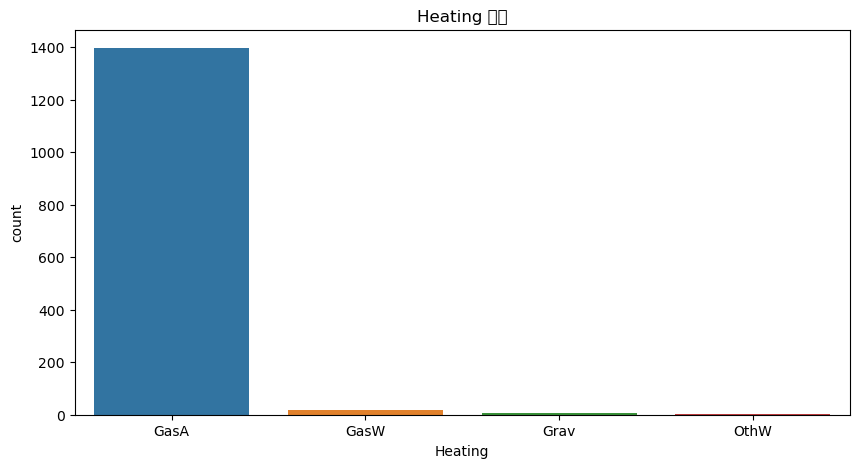

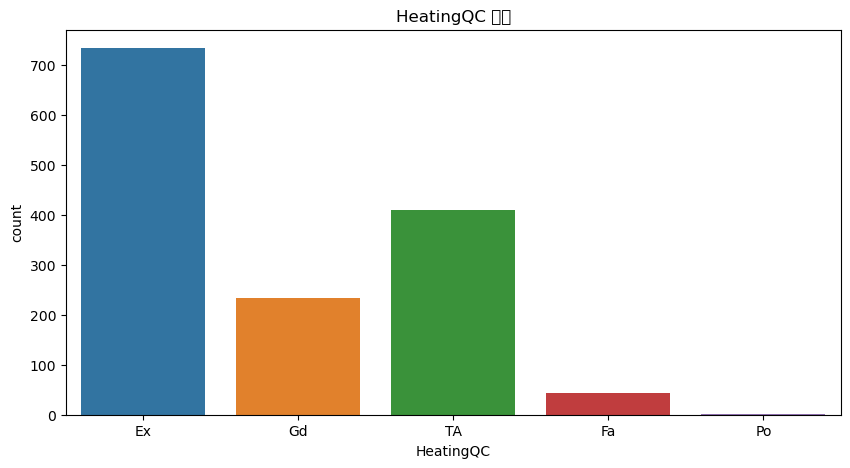

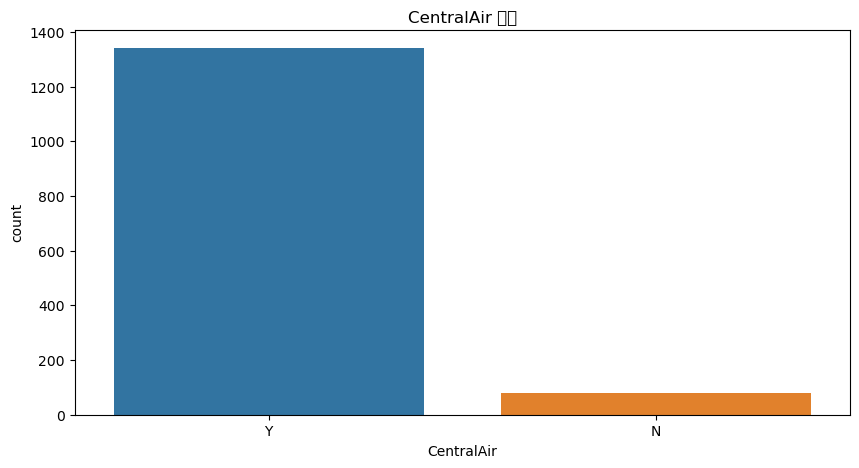

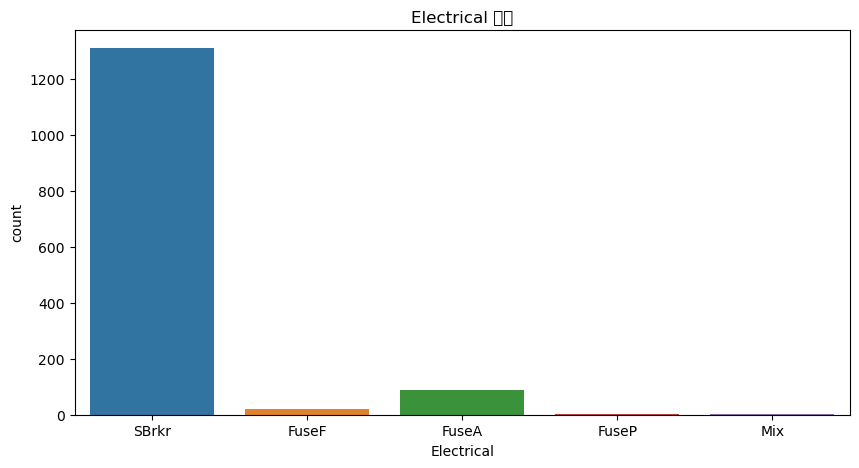

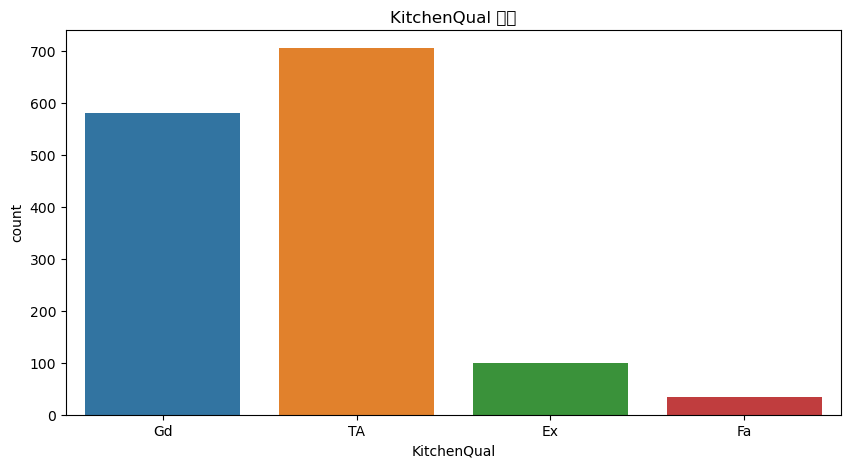

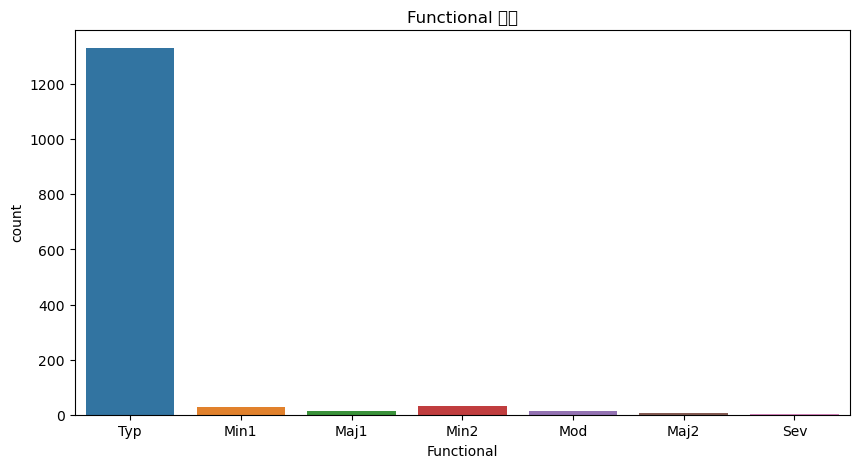

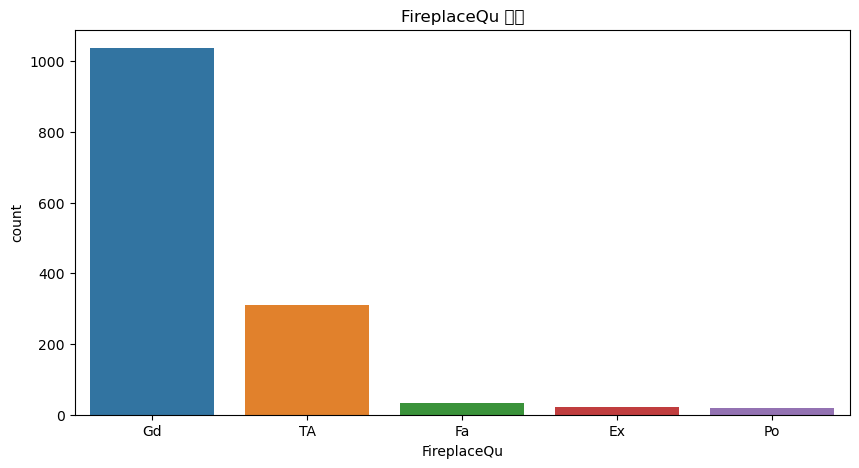

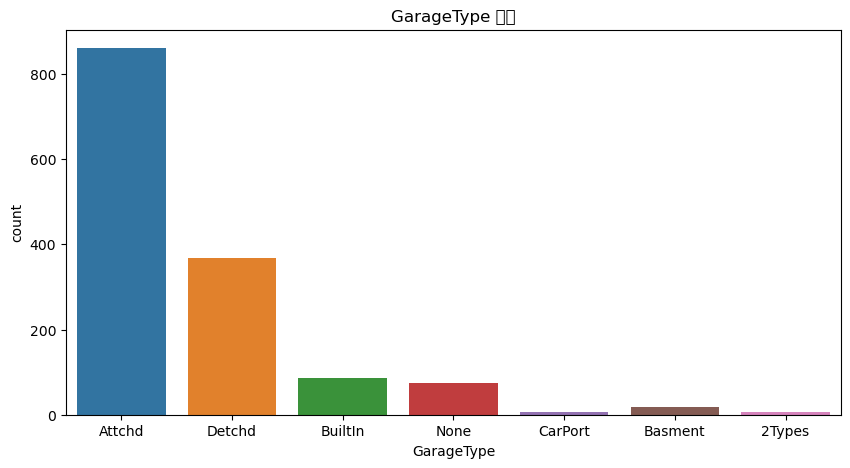

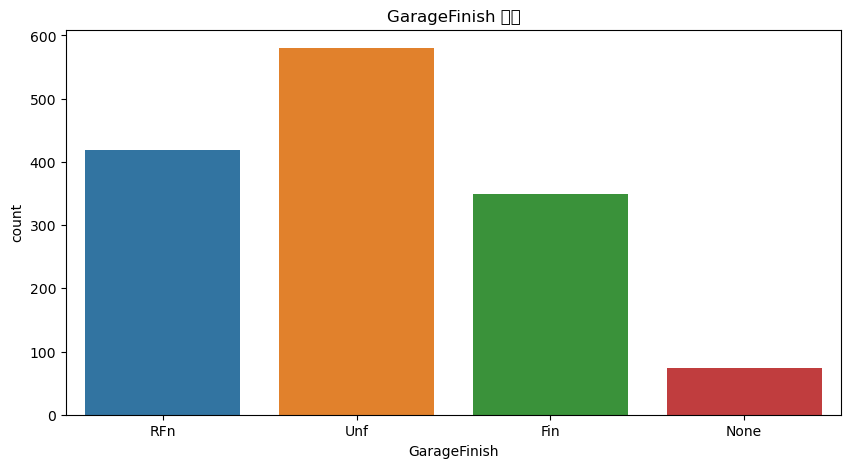

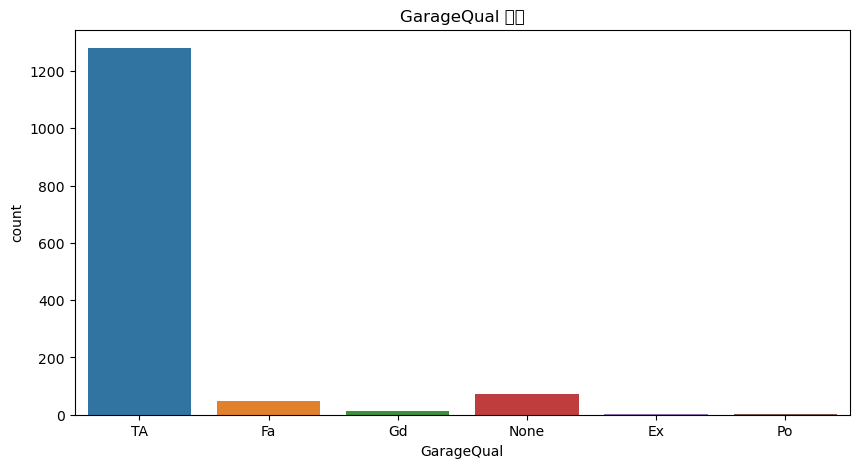

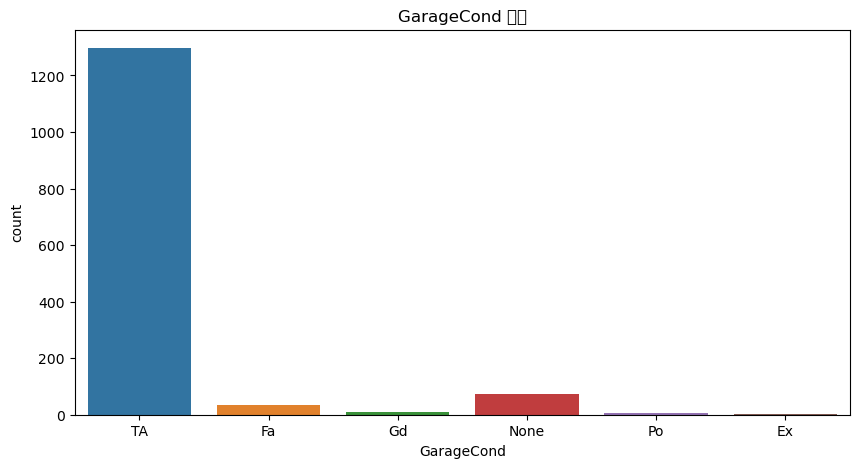

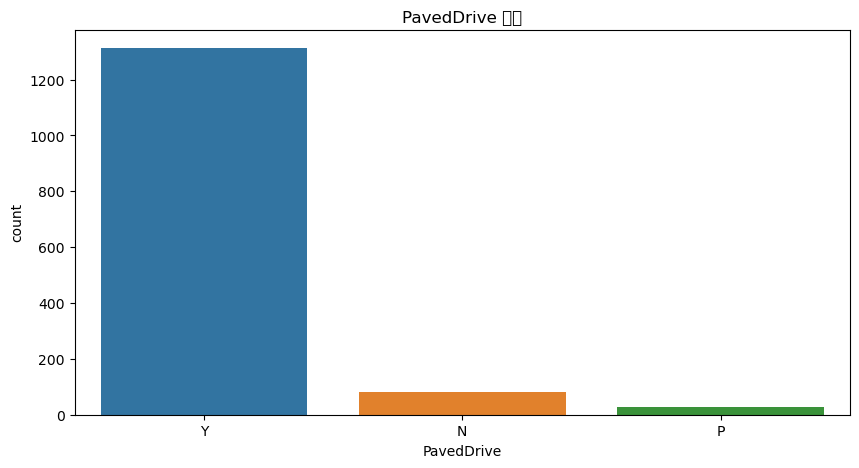

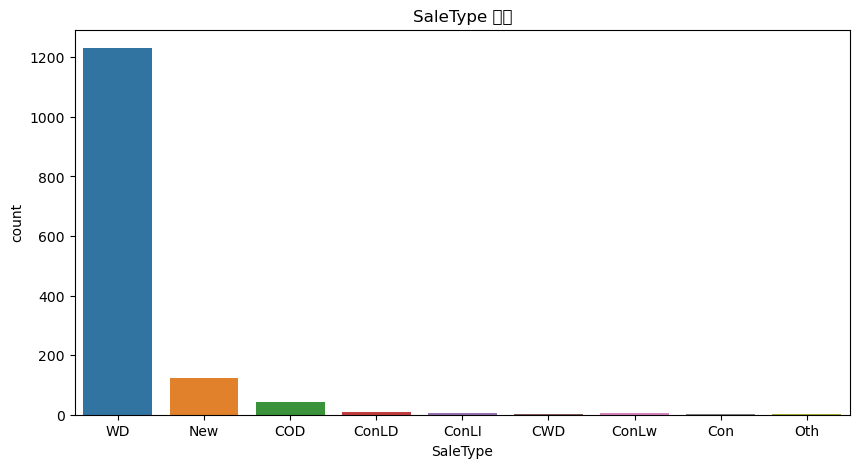

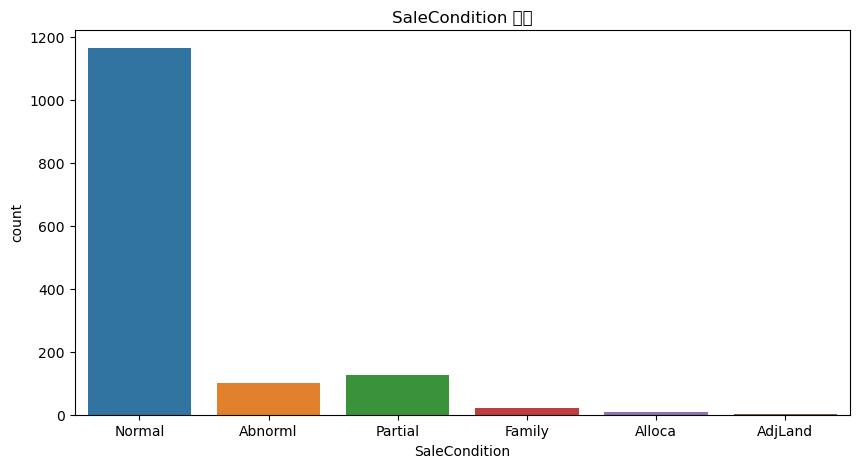

In [52]:
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'{col} 분포')
    plt.show()

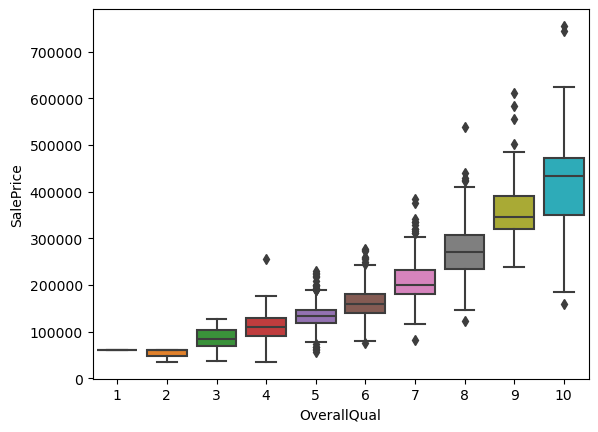

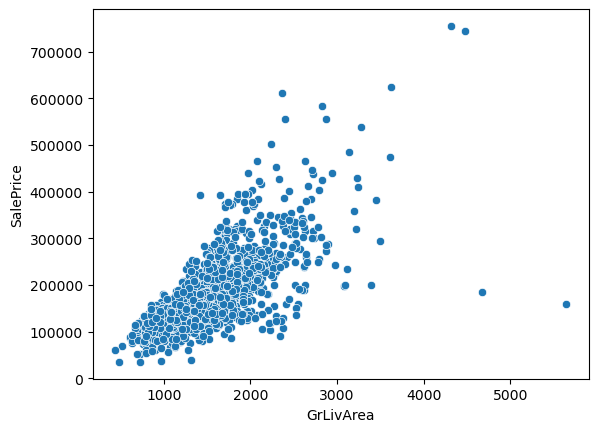

In [53]:
sns.boxplot(data=df, x='OverallQual', y='SalePrice')
plt.show()

sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')
plt.show()

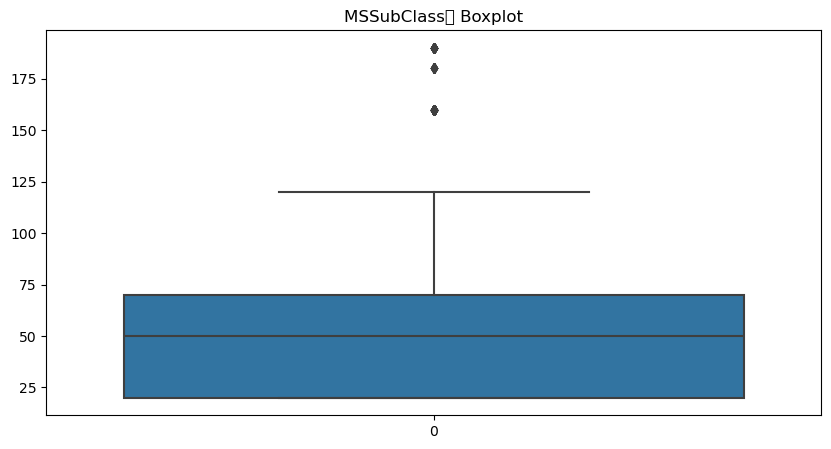

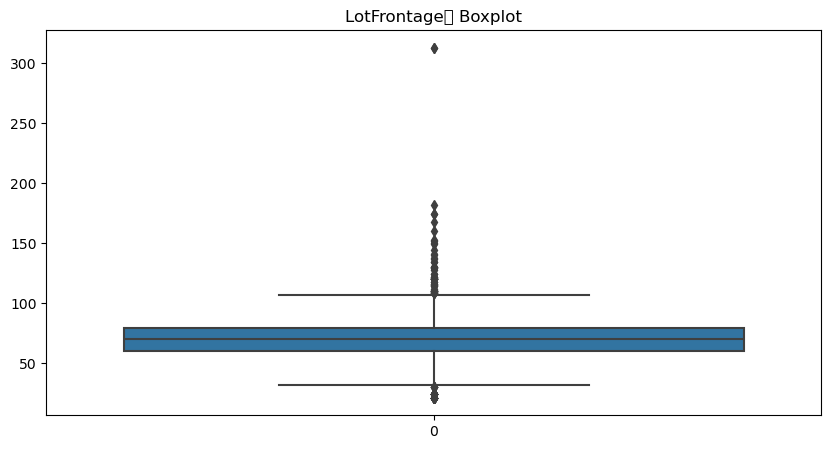

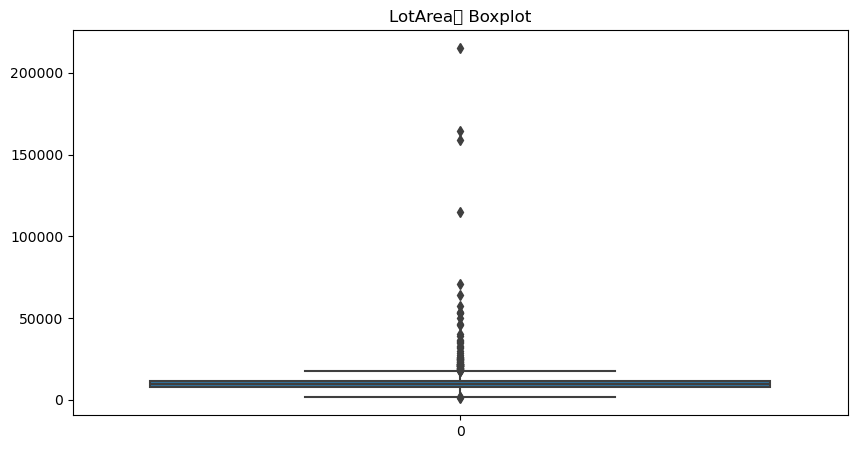

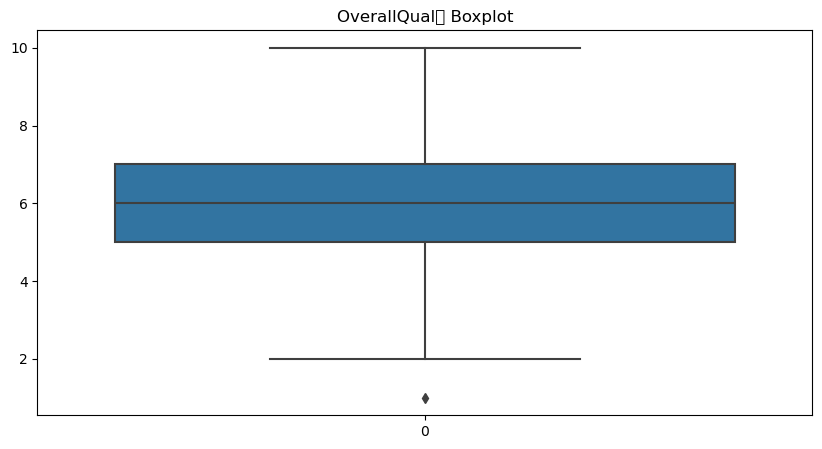

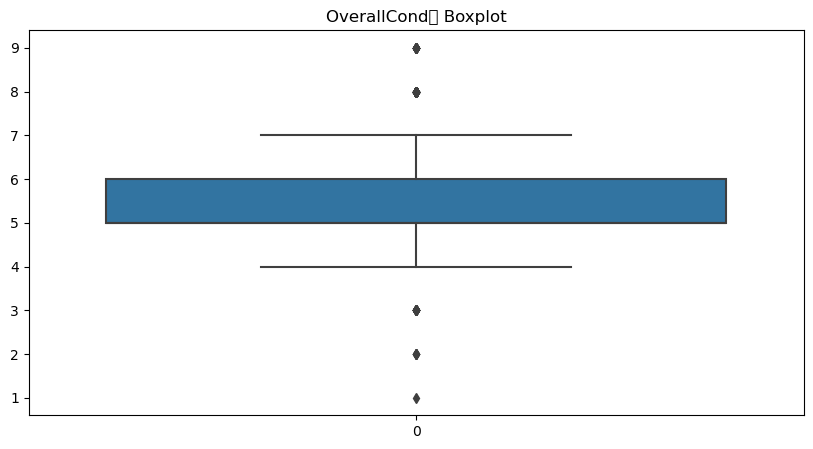

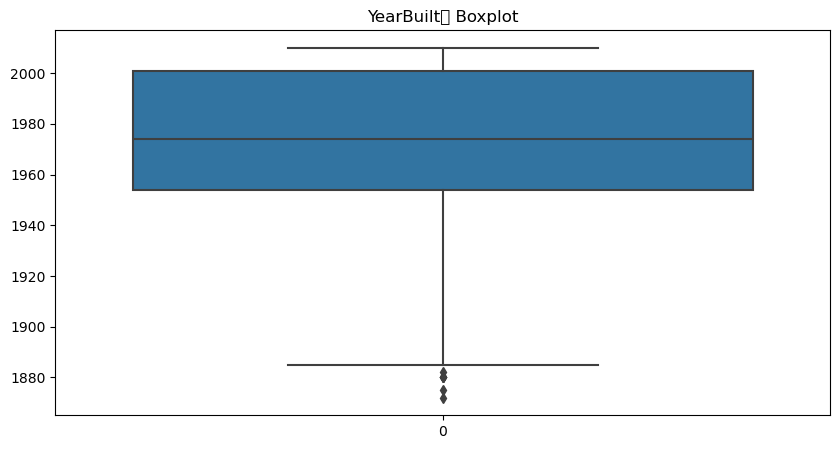

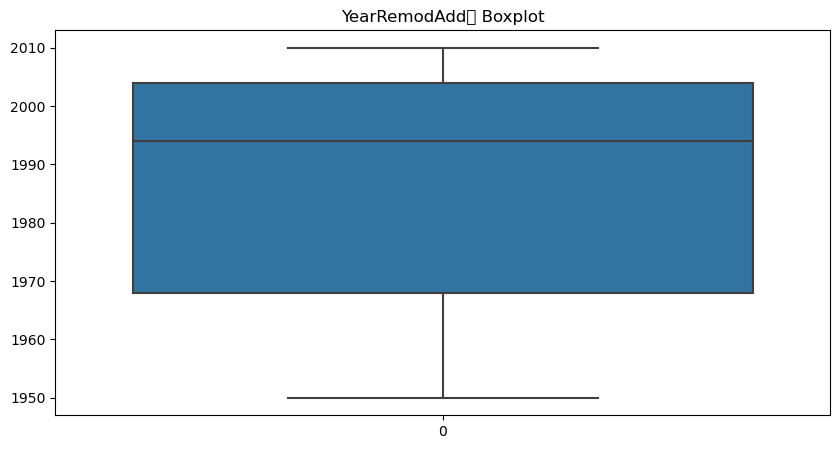

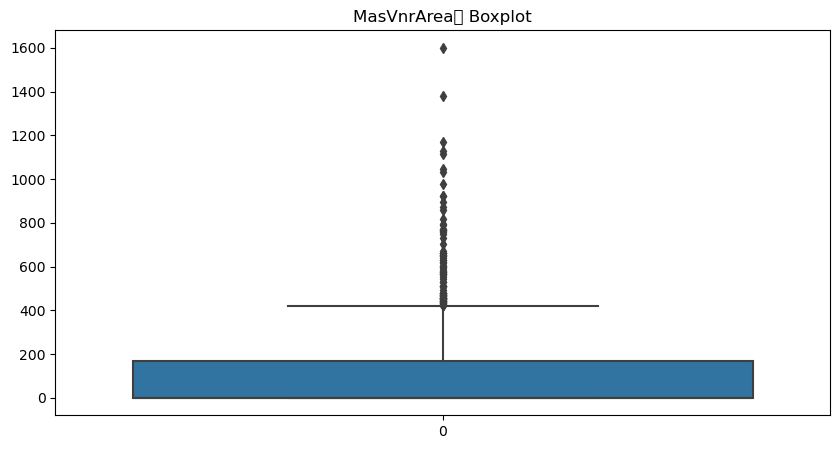

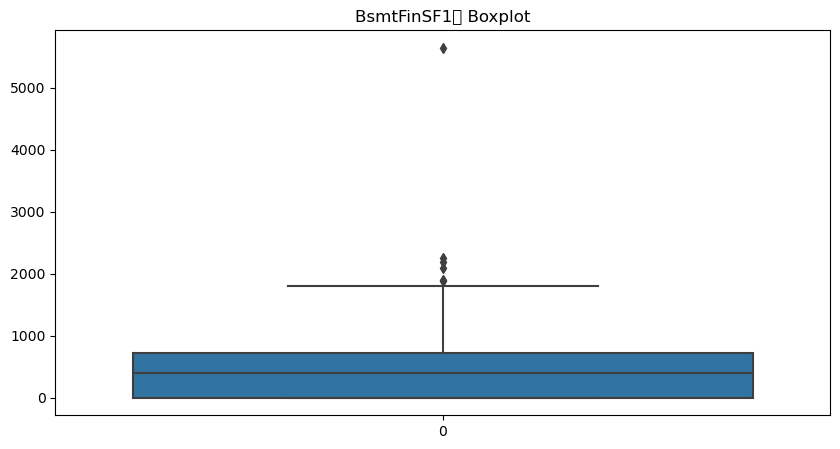

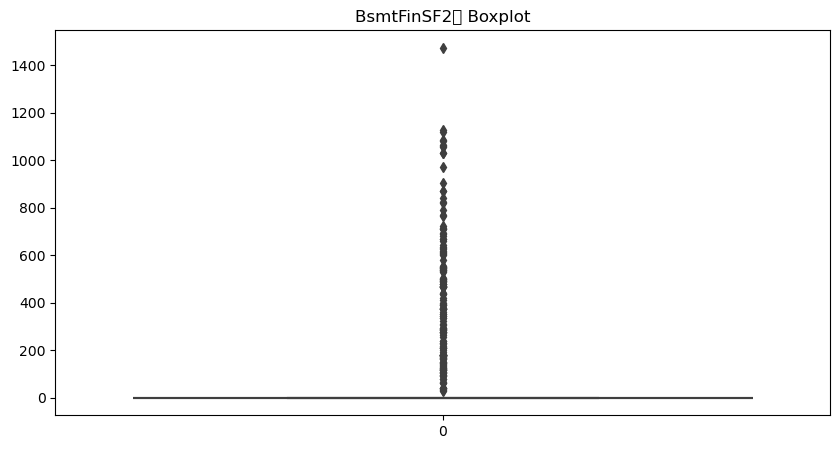

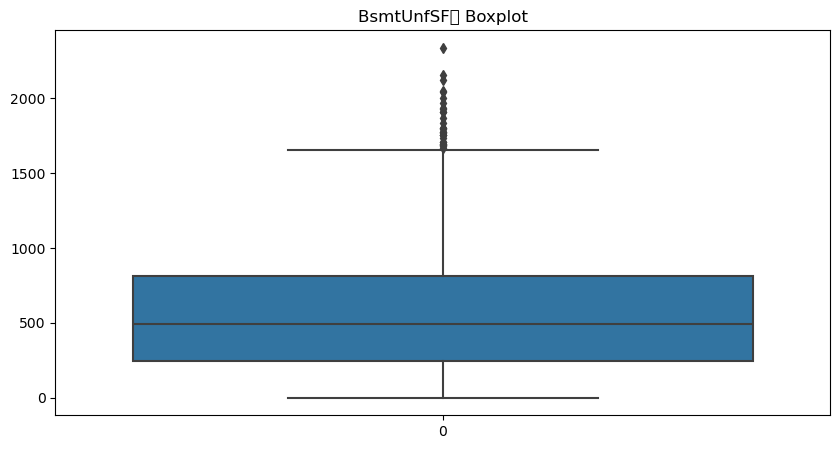

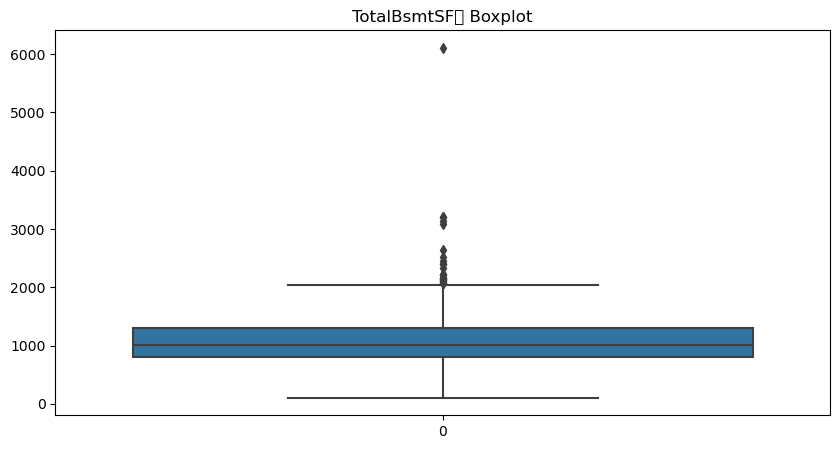

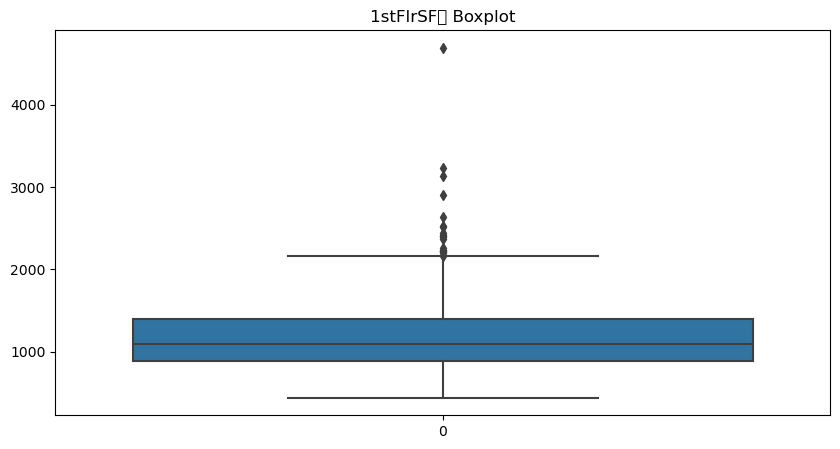

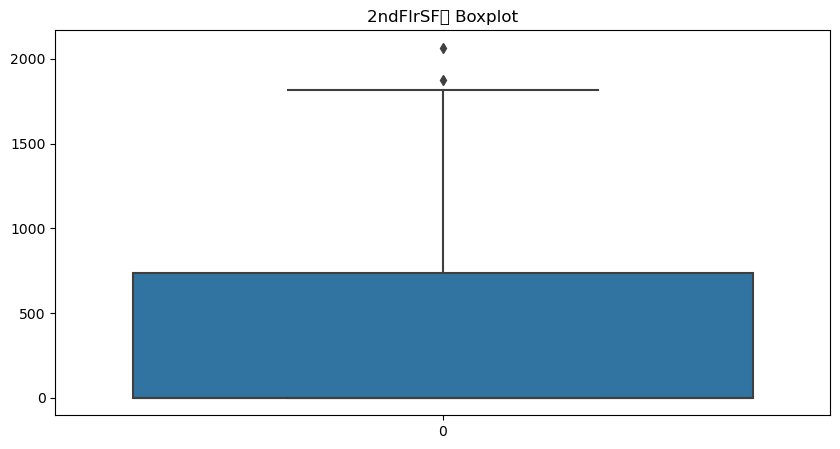

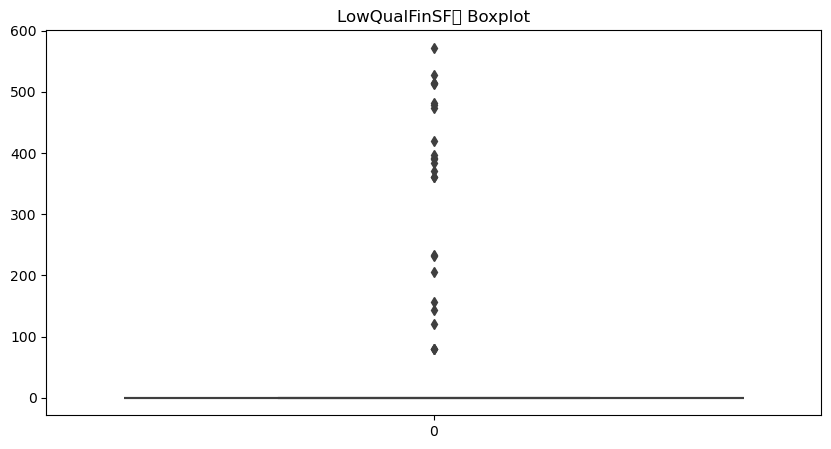

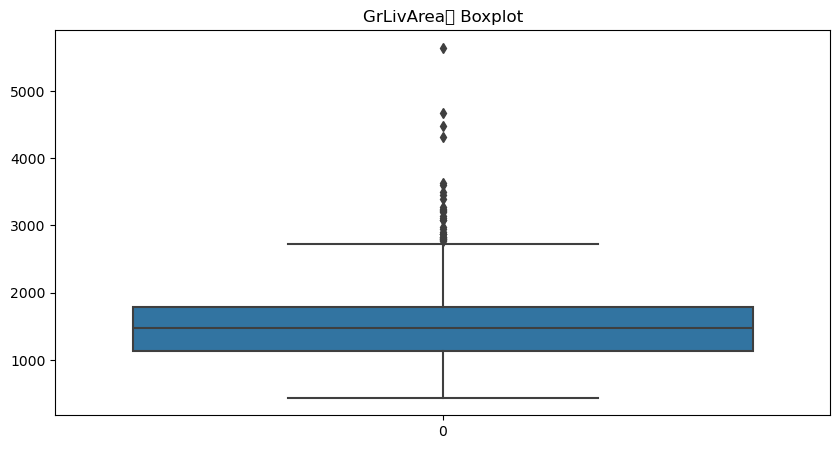

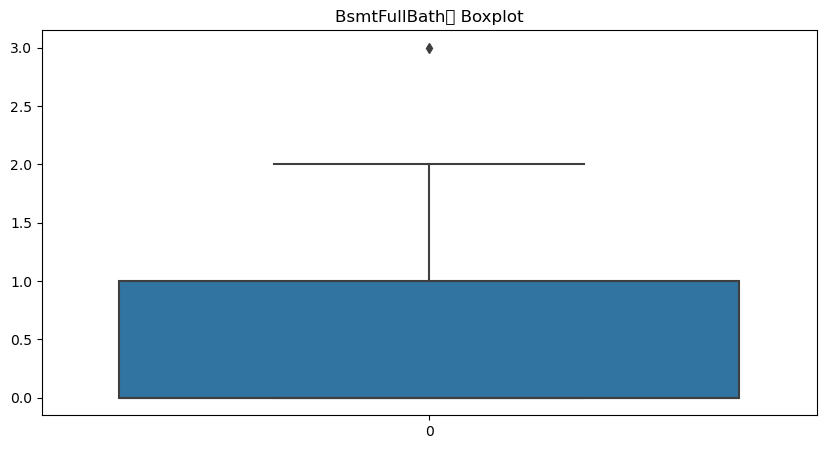

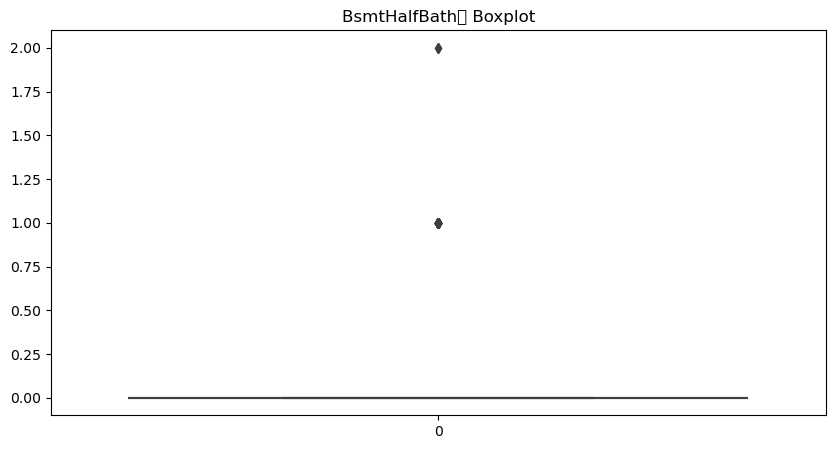

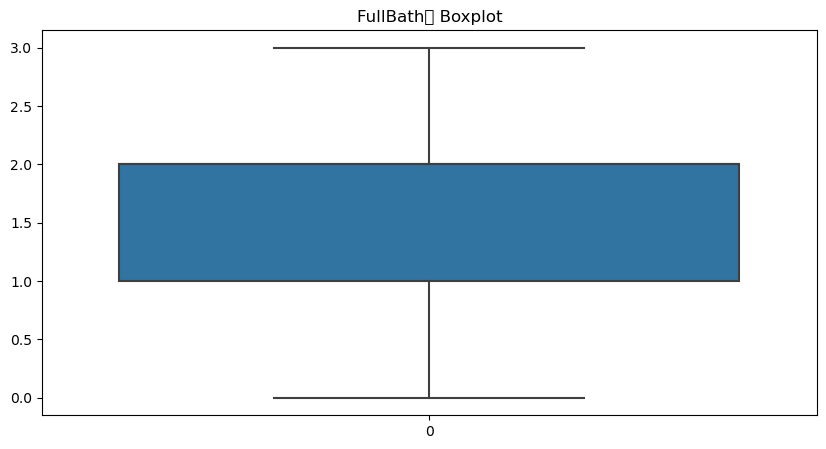

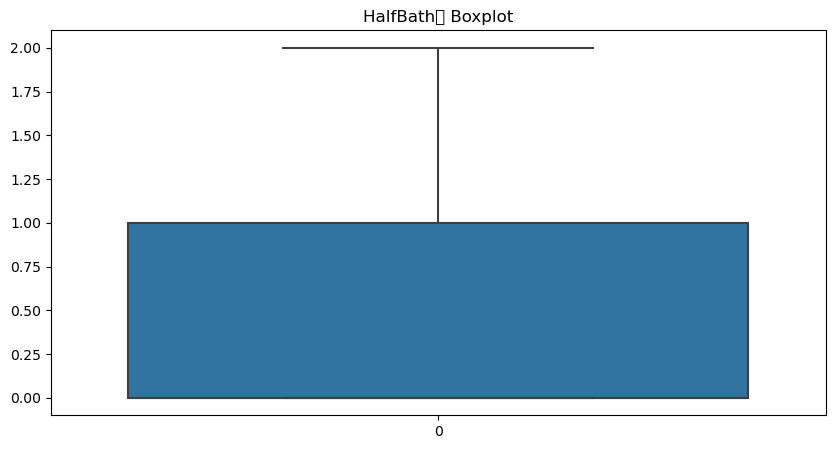

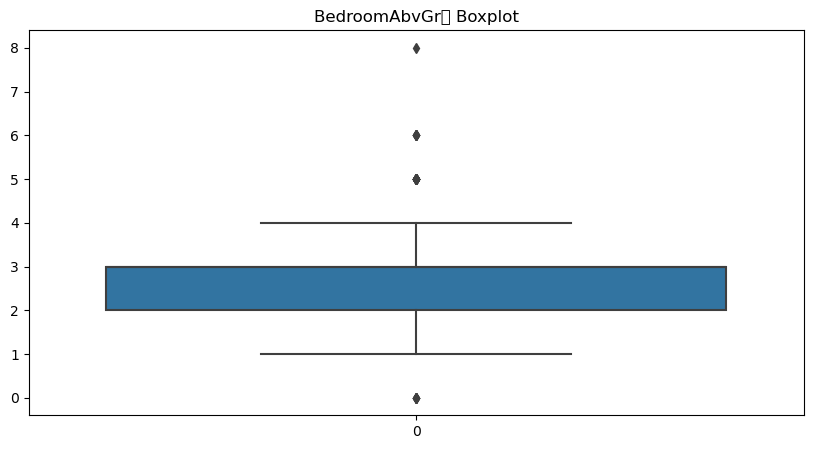

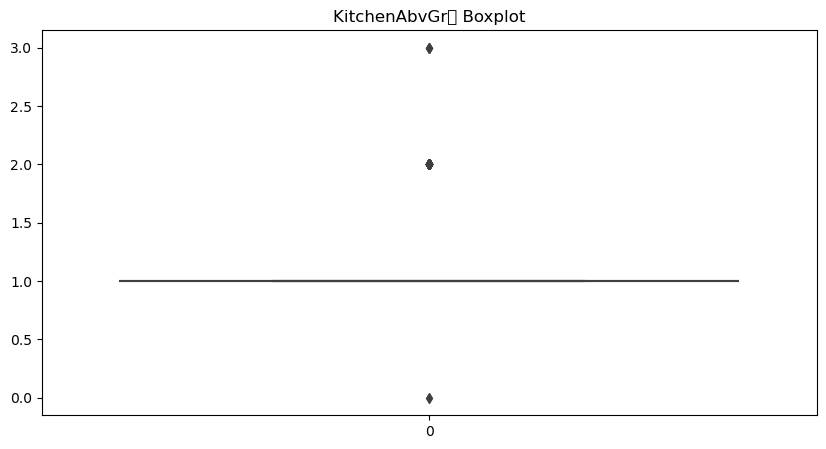

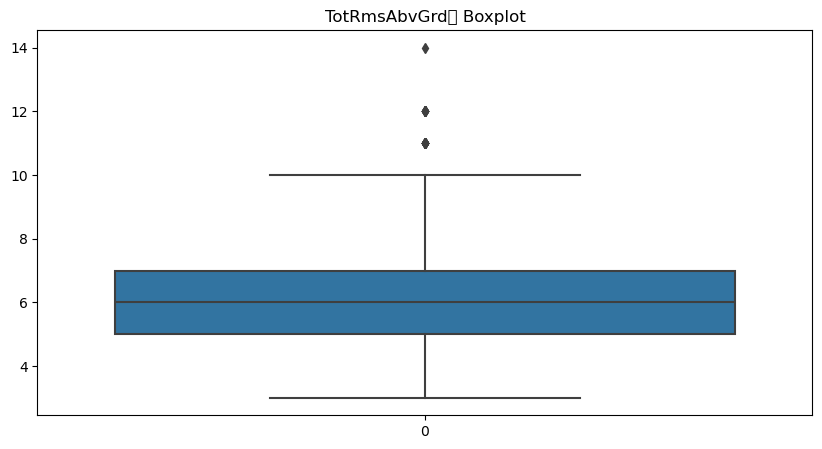

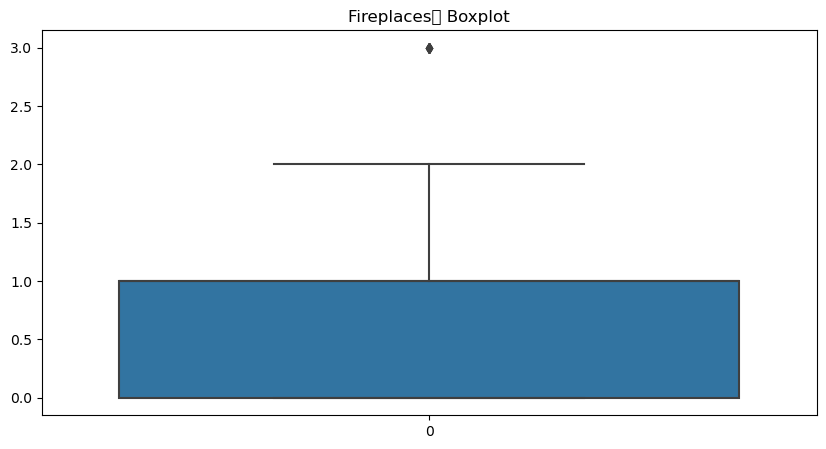

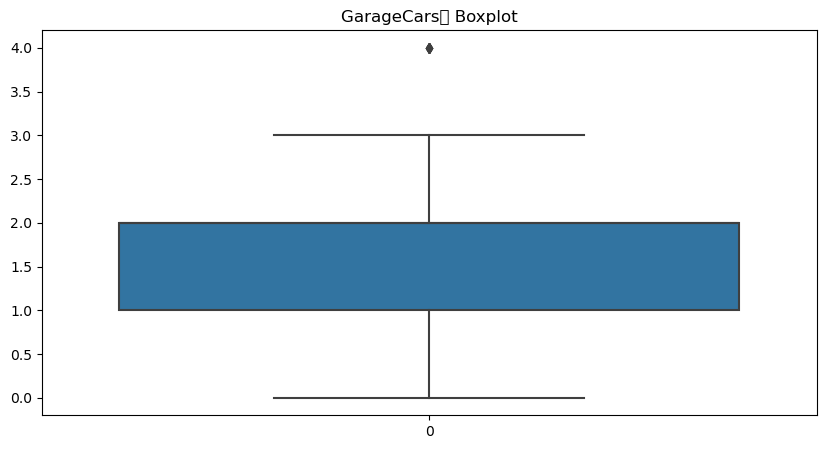

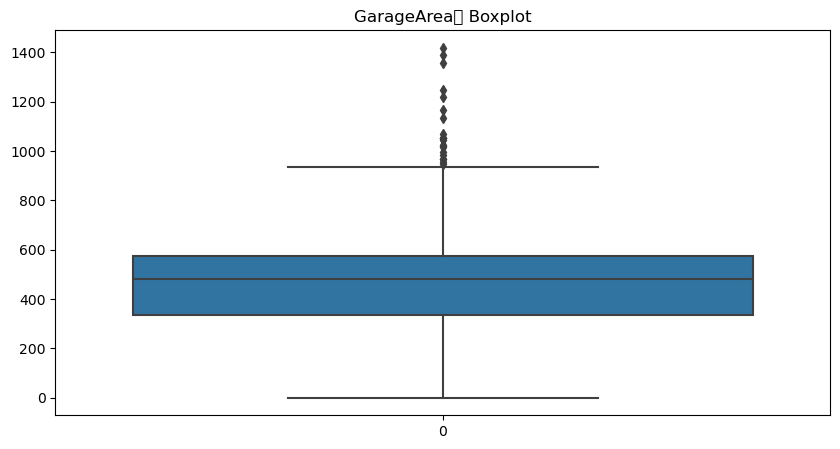

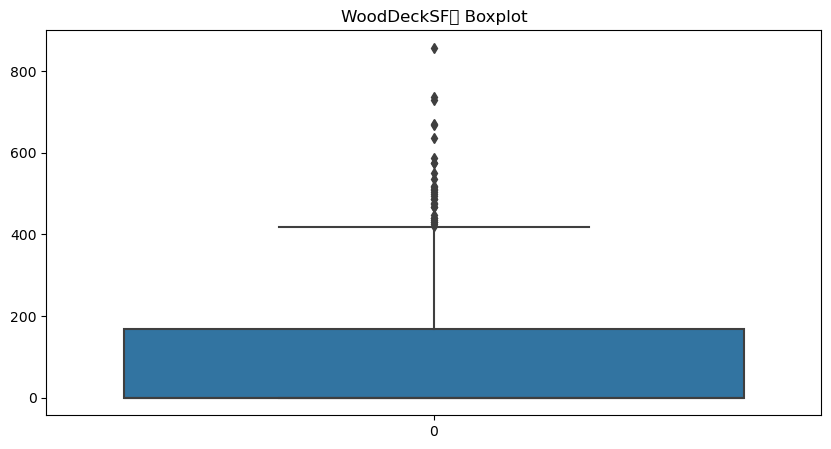

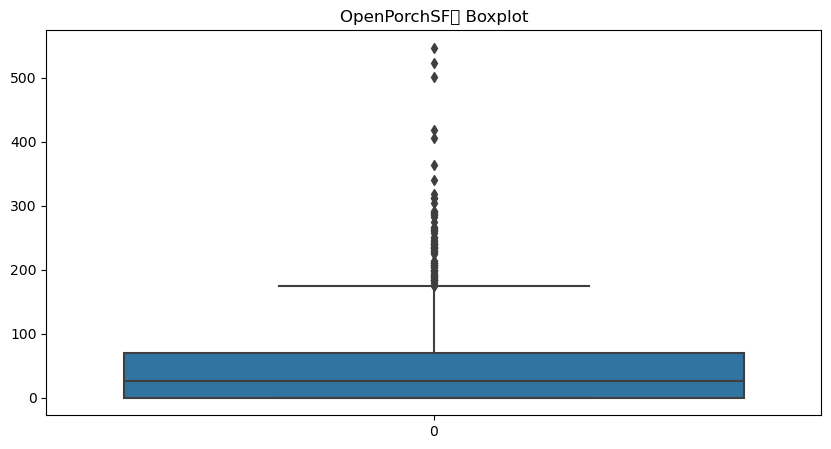

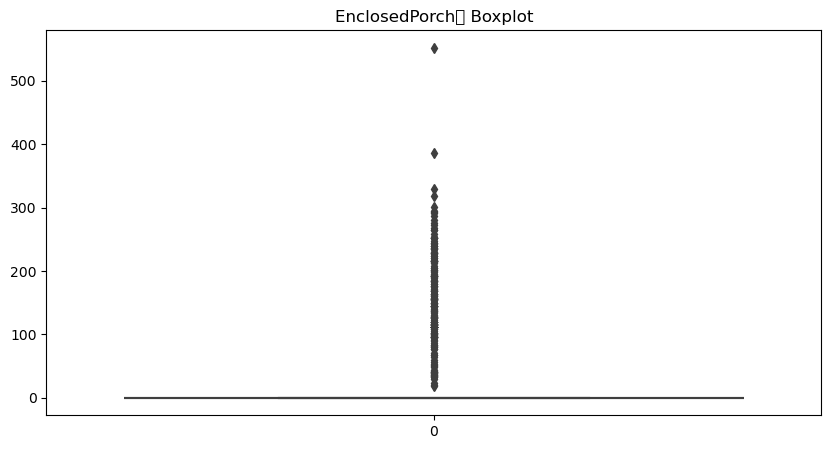

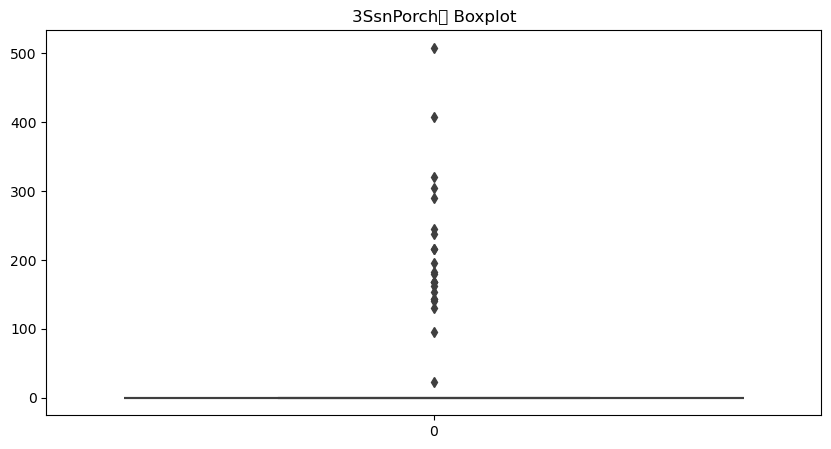

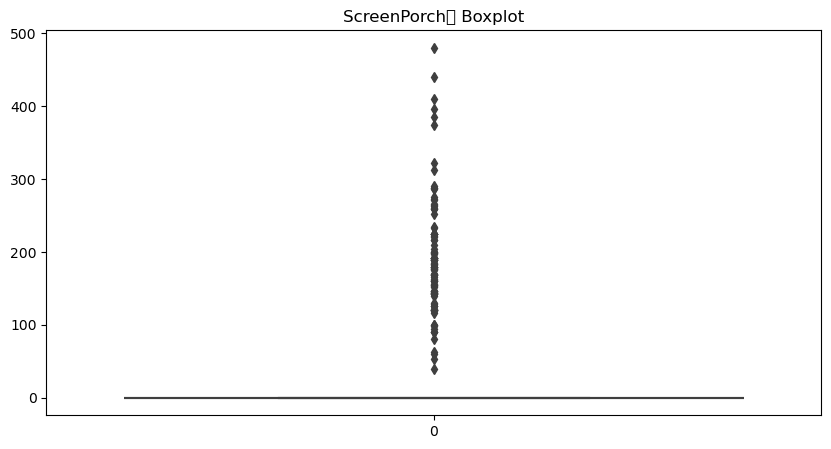

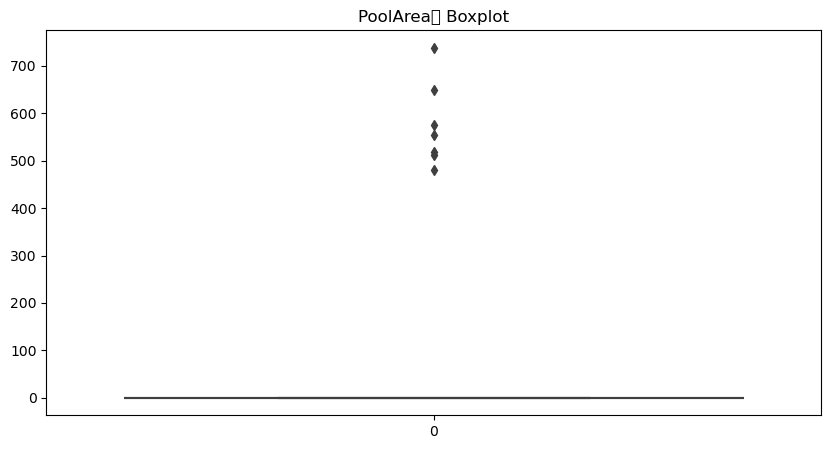

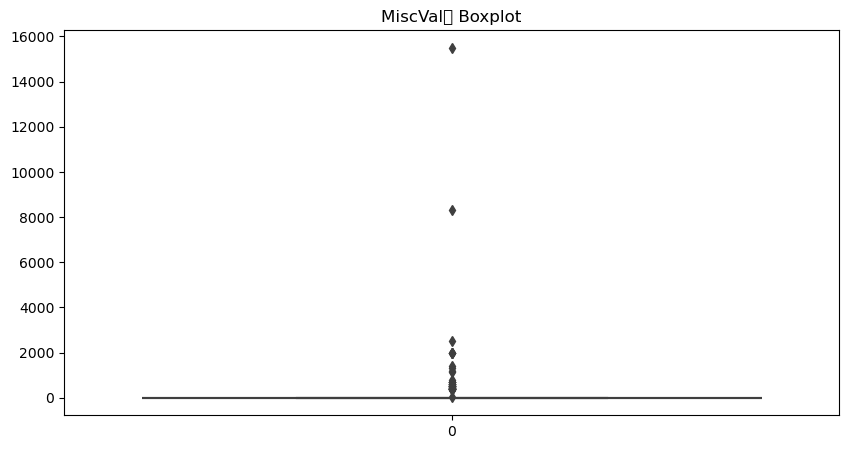

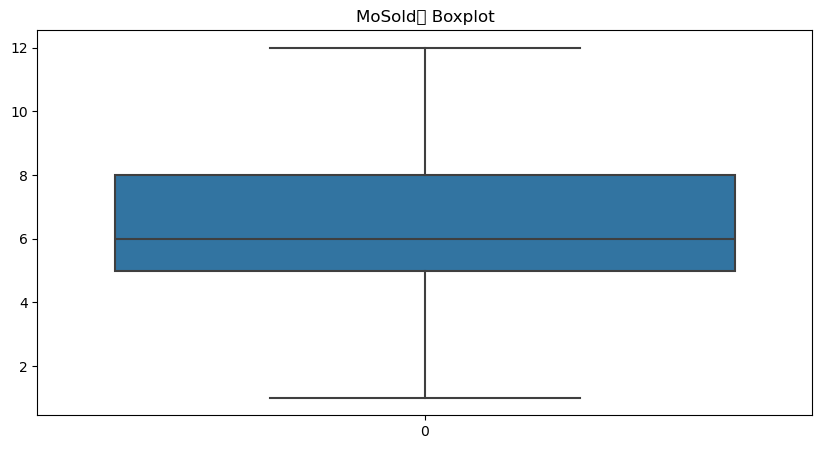

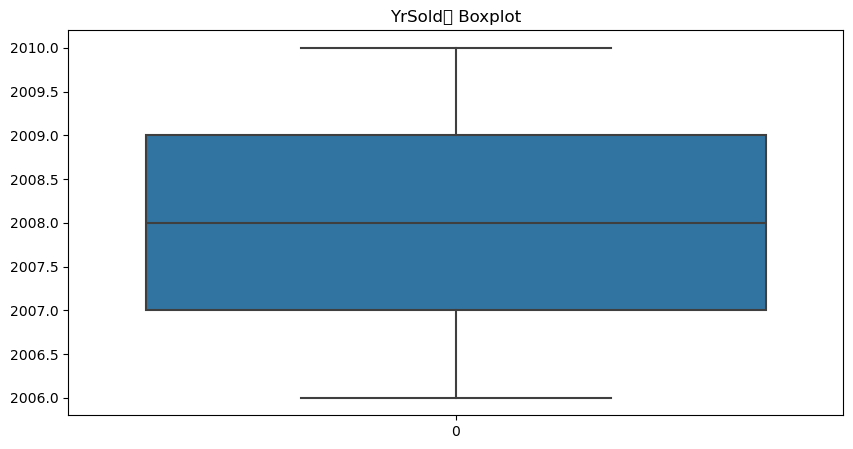

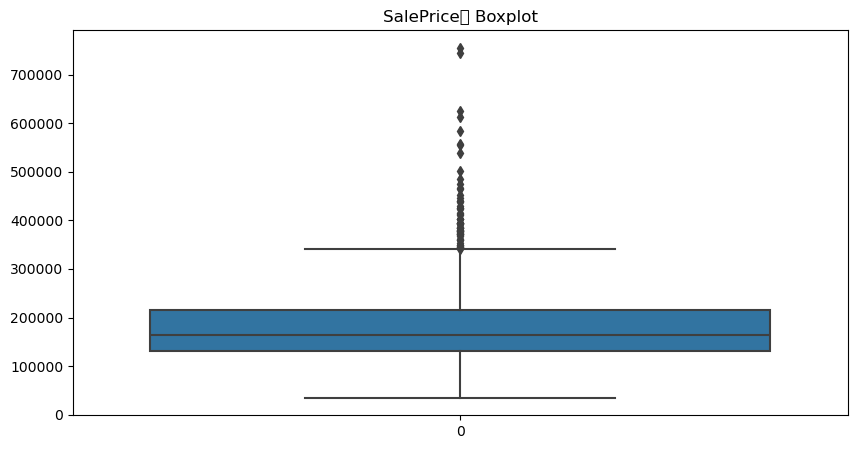

In [54]:
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[col])
    plt.title(f'{col}의 Boxplot')
    plt.show()